<a href="https://colab.research.google.com/github/K37VIN/cat-and-dog-classifier/blob/main/CatAndDogClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats --force

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:48<00:00, 23.1MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.3MB/s]


In [4]:
## code for unzipping the files
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,BatchNormalization,Dropout

In [6]:
#generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
    )

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
    )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
#Normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [8]:
#create CNN model

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))



In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 77s 107ms/step - loss: 1.1678 - accuracy: 0.5963 - val_loss: 0.6342 - val_accuracy: 0.6464
Epoch 2/10
625/625 [==============================] - 68s 107ms/step - loss: 0.5715 - accuracy: 0.7032 - val_loss: 0.5165 - val_accuracy: 0.7320
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5137 - accuracy: 0.7553 - val_loss: 0.8128 - val_accuracy: 0.6754
Epoch 4/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4465 - accuracy: 0.7939 - val_loss: 0.4347 - val_accuracy: 0.7960
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3749 - accuracy: 0.8316 - val_loss: 0.4802 - val_accuracy: 0.7772
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3314 - accuracy: 0.8567 - val_loss: 0.4112 - val_accuracy: 0.8094
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2473 - accuracy: 0.8976 - val_loss: 0.4745 - val_ac

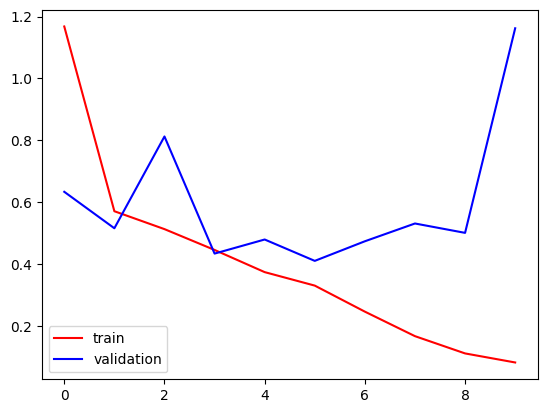

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

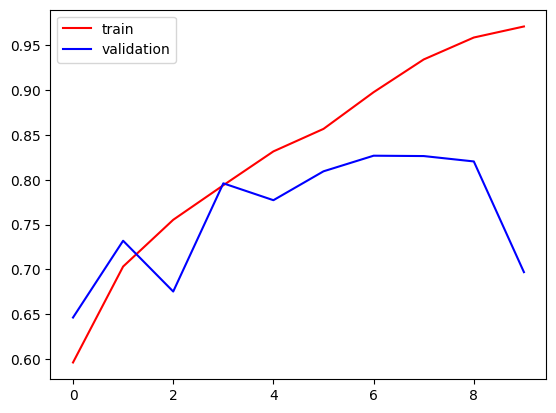

In [13]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [28]:
import cv2

In [29]:
test_img=cv2.imread('/content/cat.jpg')

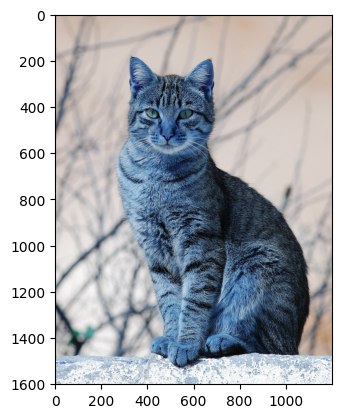

In [30]:
plt.imshow(test_img)

In [31]:
test_img.shape

(1602, 1200, 3)

In [32]:
test_img=cv2.resize(test_img,(256,256))

In [33]:
test_input=test_img.reshape((1,256,256,3))

In [34]:
model.predict(test_input)

1/1 [==============================] - 0s 20ms/step


array([[0.]], dtype=float32)